This is project done by Rifat Rahman for the course CSE 6406.


#Package import

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import os
import keras
import numpy as np
import pandas as pd
from google.colab import files
from itertools import product
from keras.models import load_model
from keras.utils import to_categorical
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.preprocessing import scale

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras import optimizers
from keras.layers import TimeDistributed
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

from sklearn.preprocessing import LabelEncoder
from keras import callbacks

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate, Dropout
from keras.models import Model
import numpy as np

#Data Preparation 

In [ ]:
#Promoter & Non-Promoter

f1=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/promoter and non-promoter/negative2860.txt','r')
lines=f1.readlines()
f1.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/promoter and non-promoter/positive_2860.txt','r')
lines1=f2.readlines()
f2.close()

oout=[]
seqs = []
for i in range(len(lines)//3):
  sequence=str(lines[i*3+1][0:len(lines[i*3+1])-1])+str(lines[i*3+2][0:len(lines[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("NonPromoter")
for i in range(len(lines1)//3):
  sequence=str(lines1[i*3+1][0:len(lines1[i*3+1])-1])+str(lines1[i*3+2][0:len(lines1[i*3+2])-1])
  #seqs.append(sequence.upper())
main_seqs = np.copy(seqs)
predictions_dictionary = {}

print(len(seqs))

2860


In [ ]:
oout=[]

for i in range(2860):
  oout.append("NonPromoter")
for i in range(2860):
  oout.append("Promoter")

len(oout)

5720

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/promoter and non-promoter/pos_neg_5720.csv')


In [ ]:
#Sigma 70, 24, 32, 38, 28, 54

f1=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_70promoter.txt','r')
lines70=f1.readlines()
f1.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_24promoter.txt','r')
lines24=f2.readlines()
f2.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_28promoter.txt','r')
lines28=f2.readlines()
f2.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_32promoter.txt','r')
lines32=f2.readlines()
f2.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_38promoter.txt','r')
lines38=f2.readlines()
f2.close()

f2=open('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma_54promoter.txt','r')
lines54=f2.readlines()
f2.close()


In [ ]:
#Sigma70 and nonsigma70

#seqs = []
for i in range(len(lines70)//3):
  sequence=str(lines70[i*3+1][0:len(lines70[i*3+1])-1])+str(lines70[i*3+2][0:len(lines70[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma70")
#print(len(seqs))
for i in range(len(lines24)//3):
  sequence=str(lines24[i*3+1][0:len(lines24[i*3+1])-1])+str(lines24[i*3+2][0:len(lines24[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma24")
for i in range(len(lines32)//3):
  sequence=str(lines32[i*3+1][0:len(lines32[i*3+1])-1])+str(lines32[i*3+2][0:len(lines32[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma32")
for i in range(len(lines38)//3):
  sequence=str(lines38[i*3+1][0:len(lines38[i*3+1])-1])+str(lines38[i*3+2][0:len(lines38[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma38")
for i in range(len(lines28)//3):
  sequence=str(lines28[i*3+1][0:len(lines28[i*3+1])-1])+str(lines28[i*3+2][0:len(lines28[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma28")
for i in range(len(lines54)//3):
  sequence=str(lines54[i*3+1][0:len(lines54[i*3+1])-1])+str(lines54[i*3+2][0:len(lines54[i*3+2])-1])
  seqs.append(sequence.upper())
  oout.append("Sigma54")
main_seqs = np.copy(seqs)
predictions_dictionary = {}



4554
5720


In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/multiclass_data.csv')


In [ ]:
oout=[]

for i in range(1694):
  oout.append("Sigma70")
for i in range(1166):
  oout.append("NonSigma70")

len(oout)

2860

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma70&others.csv')


In [ ]:
#Sigma24 and NonSigma24 (excluding sigma70)

seqs = []
for i in range(len(lines24)//3):
  sequence=str(lines24[i*3+1][0:len(lines24[i*3+1])-1])+str(lines24[i*3+2][0:len(lines24[i*3+2])-1])
  seqs.append(sequence.upper())
print(len(seqs))
for i in range(len(lines32)//3):
  sequence=str(lines32[i*3+1][0:len(lines32[i*3+1])-1])+str(lines32[i*3+2][0:len(lines32[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines38)//3):
  sequence=str(lines38[i*3+1][0:len(lines38[i*3+1])-1])+str(lines38[i*3+2][0:len(lines38[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines28)//3):
  sequence=str(lines28[i*3+1][0:len(lines28[i*3+1])-1])+str(lines28[i*3+2][0:len(lines28[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines54)//3):
  sequence=str(lines54[i*3+1][0:len(lines54[i*3+1])-1])+str(lines54[i*3+2][0:len(lines54[i*3+2])-1])
  seqs.append(sequence.upper())
main_seqs = np.copy(seqs)
predictions_dictionary = {}

print(len(seqs))

484
1166


In [ ]:
oout=[]

for i in range(484):
  oout.append("Sigma24")
for i in range(682):
  oout.append("NonSigma24")

len(oout)

1166

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma24&others.csv')


In [ ]:
#Sigma32 and NonSigma32 (excluding sigma70,24)

seqs = []

for i in range(len(lines32)//3):
  sequence=str(lines32[i*3+1][0:len(lines32[i*3+1])-1])+str(lines32[i*3+2][0:len(lines32[i*3+2])-1])
  seqs.append(sequence.upper())
print(len(seqs))
for i in range(len(lines38)//3):
  sequence=str(lines38[i*3+1][0:len(lines38[i*3+1])-1])+str(lines38[i*3+2][0:len(lines38[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines28)//3):
  sequence=str(lines28[i*3+1][0:len(lines28[i*3+1])-1])+str(lines28[i*3+2][0:len(lines28[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines54)//3):
  sequence=str(lines54[i*3+1][0:len(lines54[i*3+1])-1])+str(lines54[i*3+2][0:len(lines54[i*3+2])-1])
  seqs.append(sequence.upper())
main_seqs = np.copy(seqs)
predictions_dictionary = {}

print(len(seqs))

291
682


In [ ]:
oout=[]

for i in range(291):
  oout.append("Sigma32")
for i in range(391):
  oout.append("NonSigma32")

len(oout)

682

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma32&others.csv')


In [ ]:
#Sigma38 and NonSigma38 (excluding sigma70,24,32)

seqs = []

for i in range(len(lines38)//3):
  sequence=str(lines38[i*3+1][0:len(lines38[i*3+1])-1])+str(lines38[i*3+2][0:len(lines38[i*3+2])-1])
  seqs.append(sequence.upper())
print(len(seqs))
for i in range(len(lines28)//3):
  sequence=str(lines28[i*3+1][0:len(lines28[i*3+1])-1])+str(lines28[i*3+2][0:len(lines28[i*3+2])-1])
  seqs.append(sequence.upper())
for i in range(len(lines54)//3):
  sequence=str(lines54[i*3+1][0:len(lines54[i*3+1])-1])+str(lines54[i*3+2][0:len(lines54[i*3+2])-1])
  seqs.append(sequence.upper())
main_seqs = np.copy(seqs)
predictions_dictionary = {}

print(len(seqs))

163
391


In [ ]:

oout=[]

for i in range(163):
  oout.append("Sigma38")
for i in range(228):
  oout.append("NonSigma38")

len(oout)

391

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma38&others.csv')


In [ ]:
#Sigma28 and Sigma54 (excluding sigma70,24,32,38)

seqs = []

for i in range(len(lines28)//3):
  sequence=str(lines28[i*3+1][0:len(lines28[i*3+1])-1])+str(lines28[i*3+2][0:len(lines28[i*3+2])-1])
  seqs.append(sequence.upper())
print(len(seqs))
for i in range(len(lines54)//3):
  sequence=str(lines54[i*3+1][0:len(lines54[i*3+1])-1])+str(lines54[i*3+2][0:len(lines54[i*3+2])-1])
  seqs.append(sequence.upper())
main_seqs = np.copy(seqs)
predictions_dictionary = {}

print(len(seqs))

134
228


In [ ]:

oout=[]

for i in range(134):
  oout.append("Sigma28")
for i in range(94):
  oout.append("Sigma54")

len(oout)

228

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
df5=pd.DataFrame()

df["seq"]=seqs
df["label"]=oout

df1=df.sample(frac = 1) 
df2=df1.sample(frac = 1) 
df3=df2.sample(frac = 1) 
df4=df3.sample(frac = 1) 
df5=df4.sample(frac = 1) 


#df5.to_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma28&sigma54.csv')


#Promotor Non Promoter

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/MyDrive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/promoter and non-promoter/pos_neg_5720.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonPromoter":
  #if i==0.0:
    #print("Handaise")
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    #print("Handay nai")
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items



# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)


# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)


# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN
digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 78, 256)      69376       input_11[0][0]                   
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 4576 samples, validate on 1144 samples
Epoch 1/10
4576/4576 [==============================] - 25s 6ms/step - loss: 0.8191 - accuracy: 0.4980 - val_loss: 0.6920 - val_accuracy: 0.5236
Epoch 2/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.7023 - accuracy: 0.5133 - val_loss: 0.6926 - val_accuracy: 0.5262
Epoch 3/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6954 - accuracy: 0.5181 - val_loss: 0.6907 - val_accuracy: 0.5918
Epoch 4/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6861 - accuracy: 0.5387 - val_loss: 0.6678 - val_accuracy: 0.7281
Epoch 5/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6524 - accuracy: 0.6084 - val_loss: 0.5701 - val_accuracy: 0.7701
Epoch 6/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.5811 - accuracy: 0.7015 - val_loss: 0.5251 - val_accuracy: 0.7719
Epoch 7/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.557

In [ ]:
#Promoter MonPromoter binary classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/Promoter&NonPromoter.h5'
model.save(model_name)

Saving Model...


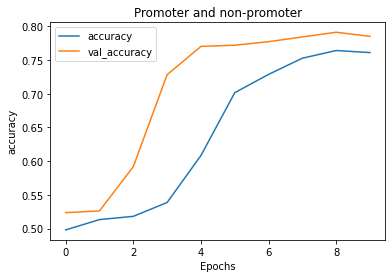

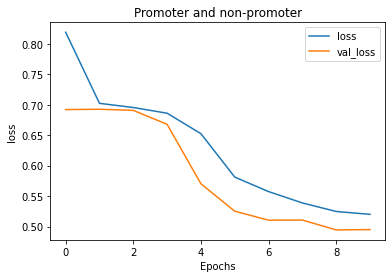

In [ ]:
#Promoter NonPromoter classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Promoter and non-promoter")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Sigma70 & Others

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma70&others.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonSigma70":
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items
# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)
# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)
# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN

digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_46 (Conv1D)              (None, 78, 256)      69376       input_15[0][0]                   
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 2288 samples, validate on 572 samples
Epoch 1/10
2288/2288 [==============================] - 13s 6ms/step - loss: 0.8665 - accuracy: 0.5284 - val_loss: 0.6885 - val_accuracy: 0.6084
Epoch 2/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.7148 - accuracy: 0.5398 - val_loss: 0.6868 - val_accuracy: 0.6066
Epoch 3/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.6997 - accuracy: 0.5332 - val_loss: 0.6883 - val_accuracy: 0.6066
Epoch 4/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.6883 - accuracy: 0.5594 - val_loss: 0.6858 - val_accuracy: 0.6066
Epoch 5/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.6862 - accuracy: 0.5712 - val_loss: 0.6849 - val_accuracy: 0.6066
Epoch 6/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.6847 - accuracy: 0.5629 - val_loss: 0.6838 - val_accuracy: 0.6066
Epoch 7/10
2288/2288 [==============================] - 12s 5ms/step - loss: 0.6809

In [ ]:
#sigma70 and NonSigma70 classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/sigma70&Nonsigma70.h5'
model.save(model_name)
print("saved")

Saving Model...
saved


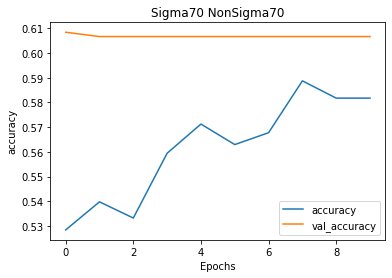

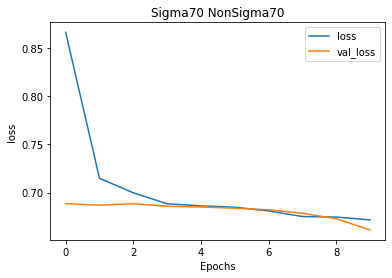

In [ ]:
#Sigma70 NonSigma70 classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Sigma70 NonSigma70")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Sigma24 & Others

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma24&others.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonSigma24":
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items
# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)
# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)
# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN

digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_59 (Conv1D)              (None, 78, 256)      69376       input_19[0][0]                   
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 932 samples, validate on 234 samples
Epoch 1/10
932/932 [==============================] - 7s 7ms/step - loss: 1.1345 - accuracy: 0.5536 - val_loss: 0.6869 - val_accuracy: 0.5513
Epoch 2/10
932/932 [==============================] - 5s 5ms/step - loss: 0.7820 - accuracy: 0.5193 - val_loss: 0.6907 - val_accuracy: 0.5684
Epoch 3/10
932/932 [==============================] - 5s 5ms/step - loss: 0.7408 - accuracy: 0.5300 - val_loss: 0.6882 - val_accuracy: 0.5556
Epoch 4/10
932/932 [==============================] - 5s 5ms/step - loss: 0.7191 - accuracy: 0.5172 - val_loss: 0.6883 - val_accuracy: 0.5556
Epoch 5/10
932/932 [==============================] - 5s 5ms/step - loss: 0.7120 - accuracy: 0.5311 - val_loss: 0.6891 - val_accuracy: 0.5556
Epoch 6/10
932/932 [==============================] - 5s 5ms/step - loss: 0.6918 - accuracy: 0.5515 - val_loss: 0.6898 - val_accuracy: 0.5556
Epoch 00006: early stopping


In [ ]:
#sigma24 and NonSigma24 classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/sigma24&Nonsigma24.h5'
model.save(model_name)
print("saved")

Saving Model...
saved


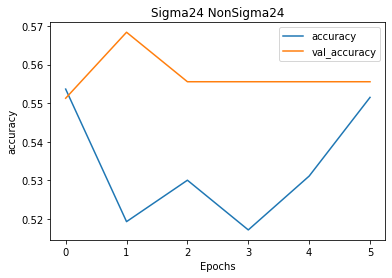

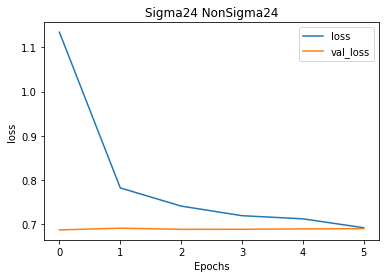

In [ ]:
#Sigma24 NonSigma24 classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Sigma24 NonSigma24")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Sigma32 & Others

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma32&others.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonSigma32":
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items
# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)
# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)
# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN

digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_72 (Conv1D)              (None, 78, 256)      69376       input_23[0][0]                   
__________________________________________________________________________________________________
input_21 (InputLayer)           (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 545 samples, validate on 137 samples
Epoch 1/10
545/545 [==============================] - 5s 9ms/step - loss: 1.2376 - accuracy: 0.4752 - val_loss: 0.6808 - val_accuracy: 0.5912
Epoch 2/10
545/545 [==============================] - 3s 5ms/step - loss: 0.8622 - accuracy: 0.5028 - val_loss: 0.6898 - val_accuracy: 0.5839
Epoch 3/10
545/545 [==============================] - 3s 5ms/step - loss: 0.7847 - accuracy: 0.5174 - val_loss: 0.6895 - val_accuracy: 0.5839
Epoch 4/10
545/545 [==============================] - 3s 5ms/step - loss: 0.7356 - accuracy: 0.5248 - val_loss: 0.6886 - val_accuracy: 0.5985
Epoch 5/10
545/545 [==============================] - 3s 5ms/step - loss: 0.7185 - accuracy: 0.5358 - val_loss: 0.6882 - val_accuracy: 0.5985
Epoch 6/10
545/545 [==============================] - 3s 5ms/step - loss: 0.7213 - accuracy: 0.5064 - val_loss: 0.6880 - val_accuracy: 0.5912
Epoch 00006: early stopping


In [ ]:
#sigma32 and NonSigma32 classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/sigma32&Nonsigma32.h5'
model.save(model_name)
print("saved")

Saving Model...
saved


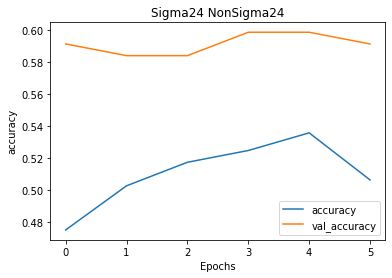

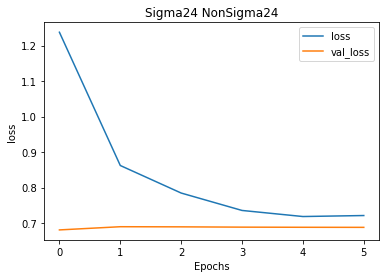

In [ ]:
#Sigma32 NonSigma32 classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Sigma24 NonSigma24")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Sigma38 & Others

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma38&others.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonSigma38":
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items
# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)
# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)
# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN

digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_85 (Conv1D)              (None, 78, 256)      69376       input_27[0][0]                   
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 312 samples, validate on 79 samples
Epoch 1/10
312/312 [==============================] - 4s 11ms/step - loss: 1.1244 - accuracy: 0.5000 - val_loss: 0.6753 - val_accuracy: 0.6329
Epoch 2/10
312/312 [==============================] - 2s 5ms/step - loss: 0.9326 - accuracy: 0.5256 - val_loss: 0.6773 - val_accuracy: 0.6456
Epoch 3/10
312/312 [==============================] - 2s 5ms/step - loss: 0.9288 - accuracy: 0.4904 - val_loss: 0.6898 - val_accuracy: 0.5443
Epoch 4/10
312/312 [==============================] - 2s 5ms/step - loss: 0.7843 - accuracy: 0.5385 - val_loss: 0.6934 - val_accuracy: 0.3797
Epoch 5/10
312/312 [==============================] - 2s 5ms/step - loss: 0.8221 - accuracy: 0.4904 - val_loss: 0.6975 - val_accuracy: 0.3418
Epoch 6/10
312/312 [==============================] - 2s 5ms/step - loss: 0.7861 - accuracy: 0.4776 - val_loss: 0.6956 - val_accuracy: 0.4304

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00006: early s

In [ ]:
#sigma38 and NonSigma38 classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/sigma38&Nonsigma38.h5'
model.save(model_name)
print("saved")

Saving Model...
saved


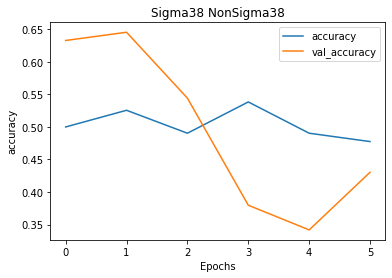

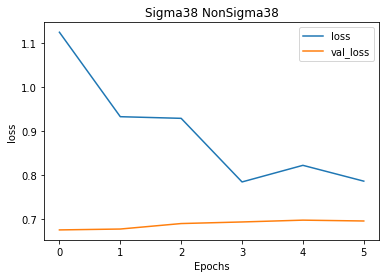

In [ ]:
#Sigma38 NonSigma38 classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Sigma38 NonSigma38")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Sigma28 & Sigma54

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/sigma subtypes/sigma28&sigma54.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(oout)
label_index=label_tokenizer.word_index

label_article = np.array(label_tokenizer.texts_to_sequences(oout))
y=label_article
label_index

{'nonpromoter': 2, 'promoter': 1}

In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="Sigma54":
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items
# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)
# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)
# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:
#B-CNN

digit_a = Input(shape=(81,4)) #Monomer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_a = Flatten()(x)

digit_b = Input(shape=(79,64)) #Trimer
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_b)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_b = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_c, digit_d], out)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 80, 90)       0                                            
__________________________________________________________________________________________________
conv1d_98 (Conv1D)              (None, 78, 256)      69376       input_31[0][0]                   
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 81, 4)        0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           (None, 79, 64)       0                                            
____________________________________________________________________________________________

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([X1, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 182 samples, validate on 46 samples
Epoch 1/10
182/182 [==============================] - 3s 17ms/step - loss: 0.9777 - accuracy: 0.5110 - val_loss: 0.7116 - val_accuracy: 0.4130
Epoch 2/10
182/182 [==============================] - 1s 5ms/step - loss: 0.9031 - accuracy: 0.5330 - val_loss: 0.7143 - val_accuracy: 0.4130
Epoch 3/10
182/182 [==============================] - 1s 5ms/step - loss: 0.7901 - accuracy: 0.5934 - val_loss: 0.7101 - val_accuracy: 0.4130
Epoch 4/10
182/182 [==============================] - 1s 5ms/step - loss: 0.7915 - accuracy: 0.5879 - val_loss: 0.7109 - val_accuracy: 0.4130
Epoch 5/10
182/182 [==============================] - 1s 6ms/step - loss: 0.7611 - accuracy: 0.5385 - val_loss: 0.7094 - val_accuracy: 0.4130
Epoch 6/10
182/182 [==============================] - 1s 5ms/step - loss: 0.7272 - accuracy: 0.5769 - val_loss: 0.7053 - val_accuracy: 0.4130
Epoch 7/10
182/182 [==============================] - 1s 5ms/step - loss: 0.7510 - accuracy: 0.5330 - 

In [ ]:
#sigma28 and Sigma54 classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/sigma28&sigma54.h5'
model.save(model_name)
print("saved")

Saving Model...
saved


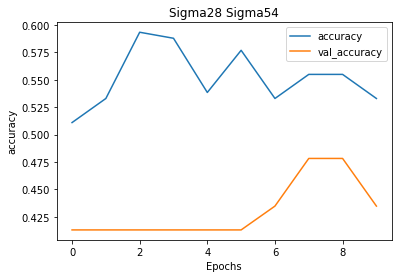

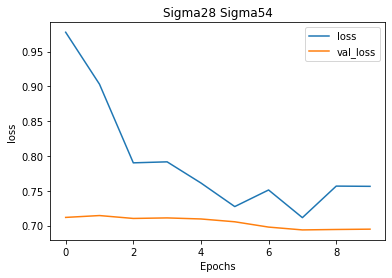

In [ ]:
#Sigma38 Sigma54 classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Sigma28 Sigma54")
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Independent Test Dataset processing

In [ ]:
f1=open('/content/drive/MyDrive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Independent test dataset/independent.txt','r')
lines=f1.readlines()
f1.close()



In [ ]:
len(lines)

512

# My own model

##Promotor Non Promoter

##Feature Extraction

In [ ]:
dff= pd.read_csv('/content/drive/MyDrive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/Benchmark dataset/promoter and non-promoter/pos_neg_5720.csv')
seqs=dff["seq"]
oout=dff["label"]

#for i in range(len(seqs)):
#  print(str(seqs[i])+"  "+str(oout[i]))

In [ ]:

k=seqs[0]

### majkhane space diye alada word banay "Trimer"== word"
def spliting_trimer(k):
  strr=""
  strr1=""
  strr2=""
  for i,j in enumerate(k):
    if(i%3==2):
      d=k[i-2:i+1]
      strr+=d+" "
    elif(i%3==0 and i!=0):
      d=k[i-2:i+1]
      strr1+=d+" "
    elif(i%3==1 and i!=1):
      d=k[i-2:i+1]
      strr2+=d+" "
  return (strr,strr1,strr2)

  ### majkhane space diye alada word banay "Tetramer"== word"
def spliting_tetramer(k):
  strr=""
  strr1=""
  strr2=""
  strr3=""
  for i,j in enumerate(k):
    if(i%4==3):
      d=k[i-3:i+1]
      strr+=d+" "
    elif(i%4==0 and i!=0):
      d=k[i-3:i+1]
      strr1+=d+" "
    elif(i%4==1 and i!=1):
      d=k[i-3:i+1]
      strr2+=d+" "
    elif(i%4==2 and i!=2):
      d=k[i-3:i+1]
      strr3+=d+" "
  return (strr,strr1,strr2,strr3)

  ### majkhane space diye alada word banay "pentamer"== word"
def spliting_pentamer(k):
  strr=""
  strr1=""
  strr2=""
  strr3=""
  strr4=""
  for i,j in enumerate(k):
    if(i%5==4):
      d=k[i-4:i+1]
      strr+=d+" "
    elif(i%5==0 and i!=0):
      d=k[i-4:i+1]
      strr1+=d+" "
    elif(i%5==1 and i!=1):
      d=k[i-4:i+1]
      strr2+=d+" "
    elif(i%5==2 and i!=2):
      d=k[i-4:i+1]
      strr3+=d+" "
    elif(i%5==3 and i!=3):
      d=k[i-4:i+1]
      strr4+=d+" "
  return (strr,strr1,strr2,strr3,strr4)



In [ ]:
seqs_tri=[]
oout_tri=[]

seqs_tetra=[]
oout_tetra=[]

seqs_penta=[]
oout_penta=[]

for h,i in enumerate(seqs):
  t3=spliting_trimer(i)
  t4=spliting_tetramer(i)
  t5=spliting_pentamer(i)

  seqs_tri.append(t3[0])
  seqs_tri.append(t3[1])
  seqs_tri.append(t3[2])
  oout_tri.append(oout[h])
  oout_tri.append(oout[h])
  oout_tri.append(oout[h])

  seqs_tetra.append(t4[0])
  seqs_tetra.append(t4[1])
  seqs_tetra.append(t4[2])
  seqs_tetra.append(t4[3])
  oout_tetra.append(oout[h])
  oout_tetra.append(oout[h])
  oout_tetra.append(oout[h])
  oout_tetra.append(oout[h])

  seqs_penta.append(t5[0])
  seqs_penta.append(t5[1])
  seqs_penta.append(t5[2])
  seqs_penta.append(t5[3])
  seqs_penta.append(t5[4])
  oout_penta.append(oout[h])
  oout_penta.append(oout[h])
  oout_penta.append(oout[h])
  oout_penta.append(oout[h])
  oout_penta.append(oout[h])


In [ ]:
#######Tri
tokenizer_tri=Tokenizer(num_words=64)
tokenizer_tri.fit_on_texts(seqs_tri)

feature_tri=tokenizer_tri.texts_to_sequences(seqs_tri)
train_padded_tri = pad_sequences(feature_tri, padding='post', maxlen=27)


#########tetra
tokenizer_tetra=Tokenizer(num_words=256)
tokenizer_tetra.fit_on_texts(seqs_tetra)

feature_tetra=tokenizer_tetra.texts_to_sequences(seqs_tetra)
train_padded_tetra = pad_sequences(feature_tetra, padding='post', maxlen=20)

#########Penta
tokenizer_penta=Tokenizer(num_words=1024)
tokenizer_penta.fit_on_texts(seqs_penta)

feature_penta=tokenizer_penta.texts_to_sequences(seqs_penta)
train_padded_penta = pad_sequences(feature_penta, padding='post', maxlen=16)



In [ ]:
############### No Need ######################
# sparse_categorical_crossentropy

#Tri
label_tokenizer_tri = Tokenizer()
label_tokenizer_tri.fit_on_texts(oout_tri)
#label_index=label_tokenizer.word_index
label_article_tri = np.array(label_tokenizer_tri.texts_to_sequences(oout_tri))

#Tetra
label_tokenizer_tetra = Tokenizer()
label_tokenizer_tetra.fit_on_texts(oout_tetra)
#label_index=label_tokenizer.word_index
label_article_tetra = np.array(label_tokenizer_tetra.texts_to_sequences(oout_tetra))

#Penta
label_tokenizer_penta = Tokenizer()
label_tokenizer_penta.fit_on_texts(oout_penta)
label_index=label_tokenizer_penta.word_index
label_article_penta = np.array(label_tokenizer_penta.texts_to_sequences(oout_penta))


In [ ]:
# categorial-cross_entropy

out=[]
for i in oout:
  if i=="NonPromoter":
  #if i==0.0:
    #print("Handaise")
    temp=[]
    temp.append(1)
    temp.append(0)
    out.append(temp)
  else:
    #print("Handay nai")
    temp=[]
    temp.append(0)
    temp.append(1)
    out.append(temp)

y=np.array(out)

In [ ]:

## Check Seqs Length
for i in range(len(seqs)):
	if len(seqs[i]) != 81:
		assert False, 'Each sequence must have a length of 81nt.\nSequence {} has length {}nt'.format(i, len(seqs[i]))
	 
## Feature Extraction ##

# Structural Properties of Di Nucleotide
di_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Di_Prop.txt')
di_prop = di_prop.iloc[:, 1:]
scaled_di_prop = scale(di_prop, axis=1) # Standardization
di_cols = di_prop.columns.tolist()
di_prop = pd.DataFrame(scaled_di_prop, columns=di_cols)
pp_di = {}
for i in range(16):
	key = di_prop.columns[i]
	items = di_prop.iloc[:, i].tolist()
	pp_di[key] = items
# Structural Properties of tri nucleotide
tri_prop = pd.read_csv('/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/btaa609_supplementary_data/btaa609_supplementary_data/physicochemical properties/DNA_Tri_Prop.txt')
tri_prop = tri_prop.iloc[:, 1:]
scaled_tri_prop = scale(tri_prop, axis=1) # Standardization
tri_cols = tri_prop.columns.tolist()
tri_prop = pd.DataFrame(scaled_tri_prop, columns=tri_cols)
pp_tri = {}
for i in range(64):
	key = tri_prop.columns[i]
	items = tri_prop.iloc[:, i].tolist()
	pp_tri[key] = items



# Mono-mer Feature
X1 = np.empty((len(seqs), len(seqs[0])))
alphabet = 'ATGC'
for i in range(len(seqs)):
	for j in range(len(seqs[0])):
		X1[i, j] = next((k for k, letter in enumerate(alphabet) if letter == seqs[i][j]))
	
X1 = to_categorical(X1)


# Tri-mer Feature
lookup_table = []
for p in product('ATGC', repeat=3):
	w = ''.join(p)
	lookup_table.append(w)
X2 = np.empty((len(seqs), len(seqs[0])-2))
for i in range(len(seqs)):
	for j in range(len(seqs[0])-2):
		w = seqs[i][j:j+3]
		X2[i,j] = lookup_table.index(w)      
X2 = to_categorical(X2)


# Di nucleotide properties feature
X3 = np.empty([len(seqs), 80, 90], dtype=float)
for i in range(len(seqs)):
	for j in range(80):
		word = seqs[i][j:j+2]
		value = pp_di[word]
		for k in range(90):
			X3[i, j, k] = value[k]
# Tri nucleotide properties feature
X4 = np.empty([len(seqs), 79, 12], dtype=float)
for i in range(len(seqs)):
	for j in range(79):
		word = seqs[i][j:j+3]
		value = pp_tri[word]
		for k in range(12):
			X4[i, j, k] = value[k]

#promoter_pred = np.argmax(PROMOTER.predict([X1, X2, X3, X4]), axis=1)

##Model Architecture

In [ ]:

##########################Tri Embedding######################################3

model_tri = tf.keras.Sequential([
    tf.keras.layers.Embedding(64, 30, input_length=27,trainable=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_tri.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_tri.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history_tri=model_tri.fit(train_padded_tri,label_article_tri,
                  batch_size=32,
                  epochs=20,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 27, 30)            1920      
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                8064      
_________________________________________________________________
flatten_27 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 51        
Total params: 10,563
Trainable params: 10,563
Non-trainable params: 0
_________________________________________________

In [ ]:
############ Sn Sp MCC ###############
############## Trimer ################
prediction = model_tri.predict(train_padded_tri)


TP=0
TN=0
FP=0
FN=0
for i in range(len(prediction)):
  if(np.argmax(prediction[i])==2 and np.argmax(prediction[i])==label_article_tri[i][0]):
    TP=TP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])==label_article_tri[i][0]):
    TN=TN+1
  elif(np.argmax(prediction[i])==2 and np.argmax(prediction[i])!=label_article_tri[i][0]):
    FP=FP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])!=label_article_tri[i][0]):
    FN=FN+1




Acc=(TN+TP)/(TN+TP+FN+FP)
print(Acc)

Sp=TN/(TN+FP)
print(Sp)

try:
  
  Sn=TP/(TP+FN)
  print(Sn)
except:
  print('No')

try:
  
  Mcc=(TP*TN-FP*FN)/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),.5)
  print(Mcc)
except:
  print('No1')

0.7961538461538461
0.7796037296037296
0.8127039627039627
0.5926324328629978


In [ ]:

##########################Tetra Embedding######################################3

model_tetra = tf.keras.Sequential([
    tf.keras.layers.Embedding(256, 120, input_length=20,trainable=True),
    tf.keras.layers.LSTM(64,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_tetra.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_tetra.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history_tetra=model_tetra.fit(train_padded_tetra,label_article_tetra,
                  batch_size=64,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 20, 120)           30720     
_________________________________________________________________
lstm_34 (LSTM)               (None, 64)                47360     
_________________________________________________________________
flatten_34 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 99        
Total params: 80,259
Trainable params: 80,259
Non-trainable params: 0
_________________________________________________

In [ ]:
############ Sn Sp MCC ###############
############## Tetramer ################
prediction = model_tetra.predict(train_padded_tetra)


TP=0
TN=0
FP=0
FN=0
for i in range(len(prediction)):
  if(np.argmax(prediction[i])==2 and np.argmax(prediction[i])==label_article_tetra[i][0]):
    TP=TP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])==label_article_tetra[i][0]):
    TN=TN+1
  elif(np.argmax(prediction[i])==2 and np.argmax(prediction[i])!=label_article_tetra[i][0]):
    FP=FP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])!=label_article_tetra[i][0]):
    FN=FN+1




Acc=(TN+TP)/(TN+TP+FN+FP)
print(Acc)

Sp=TN/(TN+FP)
print(Sp)

try:
  
  Sn=TP/(TP+FN)
  print(Sn)
except:
  print('No')

try:
  
  Mcc=(TP*TN-FP*FN)/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),.5)
  print(Mcc)
except:
  print('No1')

0.8078671328671329
0.8086538461538462
0.8070804195804195
0.6157350279134697


In [ ]:
######## Extracting weight matrix ######################
np_ara=np.array(model.get_weights()[0])
np_ara.shape

(256, 120)

In [ ]:

##########################Penta Embedding######################################3

model_penta = tf.keras.Sequential([
    tf.keras.layers.Embedding(1024, 300, input_length=16,trainable=True),
    tf.keras.layers.LSTM(64,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_penta.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_penta.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history_penta=model_penta.fit(train_padded_penta,label_article_penta,
                  batch_size=64,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 16, 300)           307200    
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                93440     
_________________________________________________________________
flatten_35 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 99        
Total params: 402,819
Trainable params: 402,819
Non-trainable params: 0
_______________________________________________

In [ ]:
############ Sn Sp MCC ###############
############## Pentamer ################
prediction = model_penta.predict(train_padded_penta)


TP=0
TN=0
FP=0
FN=0
for i in range(len(prediction)):
  if(np.argmax(prediction[i])==2 and np.argmax(prediction[i])==label_article_penta[i][0]):
    TP=TP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])==label_article_penta[i][0]):
    TN=TN+1
  elif(np.argmax(prediction[i])==2 and np.argmax(prediction[i])!=label_article_penta[i][0]):
    FP=FP+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])!=label_article_penta[i][0]):
    FN=FN+1




Acc=(TN+TP)/(TN+TP+FN+FP)
print(Acc)

Sp=TN/(TN+FP)
print(Sp)

try:
  
  Sn=TP/(TP+FN)
  print(Sn)
except:
  print('No')

try:
  
  Mcc=(TP*TN-FP*FN)/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),.5)
  print(Mcc)
except:
  print('No1')

0.8313986013986014
0.7856643356643357
0.8771328671328671
0.6655873667992436


In [ ]:
################## Di-nucleotide struct properties ################################

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

#concatenated = concatenate([out_a, out_b, out_e, out_c, out_d])
x=Dropout(rate=0.5)(out_c)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model(digit_c, out)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit(X3,y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80, 90)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 78, 256)           69376     
_________________________________________________________________
dropout_7 (Dropout)          (None, 78, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 76, 128)           98432     
_________________________________________________________________
dropout_8 (Dropout)          (None, 76, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 74, 64)            24640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 64)            0   

In [ ]:
############ Sn Sp MCC ###############
############## Di-Nucleotide structural properties ################
prediction = model.predict(X3)


TP=0
TN=0
FP=0
FN=0
for i in range(len(prediction)):
  if(np.argmax(prediction[i])==1 and np.argmax(prediction[i])==np.argmax(y[i])):
    TP=TP+1
  elif(np.argmax(prediction[i])==0 and np.argmax(prediction[i])==np.argmax(y[i])):
    TN=TN+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])!=np.argmax(y[i])):
    FP=FP+1
  elif(np.argmax(prediction[i])==0 and np.argmax(prediction[i])!=np.argmax(y[i])):
    FN=FN+1




Acc=(TN+TP)/(TN+TP+FN+FP)
print(Acc)

Sp=TN/(TN+FP)
print(Sp)

try:
  
  Sn=TP/(TP+FN)
  print(Sn)
except:
  print('No')

try:
  
  Mcc=(TP*TN-FP*FN)/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),.5)
  print(Mcc)
except:
  print('No1')

0.7627622377622377
0.8562937062937063
0.6692307692307692
0.5349677633863618


In [ ]:
################ only Tri-nucleotide structural properties ###############

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

#concatenated = concatenate([out_a, out_b, out_e, out_c, out_d])
x=Dropout(rate=0.5)(out_d)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model(digit_d, out)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit(X4,y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 79, 12)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 77, 128)           4736      
_________________________________________________________________
dropout_1 (Dropout)          (None, 77, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 64)            24640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 73, 32)            6176      
_________________________________________________________________
dropout_3 (Dropout)          (None, 73, 32)            0   

In [ ]:
############ Sn Sp MCC ###############
############## Tri-Nucleotide structural properties ################
prediction = model.predict(X4)


TP=0
TN=0
FP=0
FN=0
for i in range(len(prediction)):
  if(np.argmax(prediction[i])==1 and np.argmax(prediction[i])==np.argmax(y[i])):
    TP=TP+1
  elif(np.argmax(prediction[i])==0 and np.argmax(prediction[i])==np.argmax(y[i])):
    TN=TN+1
  elif(np.argmax(prediction[i])==1 and np.argmax(prediction[i])!=np.argmax(y[i])):
    FP=FP+1
  elif(np.argmax(prediction[i])==0 and np.argmax(prediction[i])!=np.argmax(y[i])):
    FN=FN+1




Acc=(TN+TP)/(TN+TP+FN+FP)
print(Acc)

Sp=TN/(TN+FP)
print(Sp)

try:
  
  Sn=TP/(TP+FN)
  print(Sn)
except:
  print('No')

try:
  
  Mcc=(TP*TN-FP*FN)/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),.5)
  print(Mcc)
except:
  print('No1')

0.7896853146853147
0.8073426573426573
0.772027972027972
0.5797322420155941


Final Model

In [ ]:
#B-CNN
#digit_a = Input(shape=(81,4)) #Monomer
#x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_a)
#x = Dropout(rate=0.5)(x)
#x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
#x = Dropout(rate=0.5)(x)
#x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
#x = Dropout(rate=0.5)(x)
#out_a = Flatten()(x)

digit_a = Input(shape=(79,30)) #Trimer
x = LSTM(32, dropout=0.5, activation='relu')(digit_a)
out_a = Flatten()(x)


digit_b = Input(shape=(78,120)) #Tetramer
x = LSTM(64, dropout=0.5, activation='relu')(digit_b)
out_b  = Flatten()(x)

digit_e = Input(shape=(77,300)) #pentamer
x = LSTM(128, dropout=0.5, activation='relu')(digit_e)
out_e  = Flatten()(x)

digit_c = Input(shape=(80,90)) #Dimer structural properties
x = Conv1D(filters=256,kernel_size=3,activation='relu')(digit_c)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=128,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_c = Flatten()(x)

digit_d = Input(shape=(79,12)) # Trimer structural properties
x = Conv1D(filters=128,kernel_size=3,activation='relu')(digit_d)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Conv1D(filters=32,kernel_size=3,activation='relu')(x)
x = Dropout(rate=0.5)(x)
out_d = Flatten()(x)

concatenated = concatenate([out_a, out_b, out_e, out_c, out_d])
x=Dropout(rate=0.5)(concatenated)
x=Dense(128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x=Dense(64, activation='relu')(x)
x = Dropout(rate=0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model([digit_a, digit_b, digit_e, digit_c, digit_d], out)


ValueError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



NameError: ignored

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

cb = []
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')
cb.append(reduce_lr_loss)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
cb.append(early_stop)

history=model.fit([padd, X2, X3, X4],y,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=cb,
                  verbose=1)
                  
                  

Train on 4576 samples, validate on 1144 samples
Epoch 1/10
4576/4576 [==============================] - 25s 6ms/step - loss: 0.8191 - accuracy: 0.4980 - val_loss: 0.6920 - val_accuracy: 0.5236
Epoch 2/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.7023 - accuracy: 0.5133 - val_loss: 0.6926 - val_accuracy: 0.5262
Epoch 3/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6954 - accuracy: 0.5181 - val_loss: 0.6907 - val_accuracy: 0.5918
Epoch 4/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6861 - accuracy: 0.5387 - val_loss: 0.6678 - val_accuracy: 0.7281
Epoch 5/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.6524 - accuracy: 0.6084 - val_loss: 0.5701 - val_accuracy: 0.7701
Epoch 6/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.5811 - accuracy: 0.7015 - val_loss: 0.5251 - val_accuracy: 0.7719
Epoch 7/10
4576/4576 [==============================] - 24s 5ms/step - loss: 0.557

In [ ]:
#Promoter MonPromoter binary classifier model save

print("Saving Model...")
model_name = '/content/drive/My Drive/Bio Informatics/Sigma Promoter Project/Our Trained Models/Promoter&NonPromoter.h5'
model.save(model_name)

Saving Model...


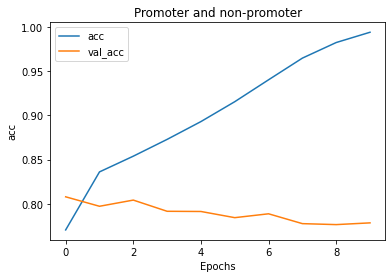

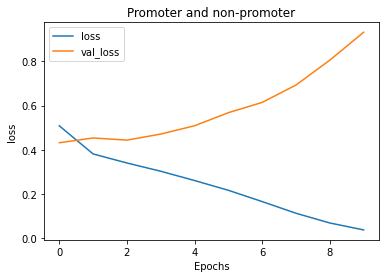

In [ ]:
#Promoter NonPromoter classifer

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Promoter and non-promoter")
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")